In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import packages and functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
# Load the Wisconsin Breast Cancer dataset
WBCD = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ZybookDataScience/Data/WisconsinBreastCancerDatabase.csv')
WBCD.head()

ID Diagnosis  Radius mean  Texture mean  Perimeter mean  Area mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   Smoothness mean  Compactness mean  Concavity mean  Concave points mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  Radius worst  Texture worst  Perimeter worst  Area worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   Smoothness worst  Compactness worst  Concavity worst  Concave points worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   Symmetry worst  Fractal dimension worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [4]:
# Convert Diagnosis to 0 and 1
WBCD.loc[WBCD['Diagnosis'] == 'B', 'Diagnosis'] = 0
WBCD.loc[WBCD['Diagnosis'] == 'M', 'Diagnosis'] = 1

In [5]:
# Store relevant columns as variables
X = WBCD[['Radius mean']].values.reshape(-1, 1)
y = WBCD[['Diagnosis']].values.reshape(-1, 1).astype(int)

In [16]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123
)


In [7]:
# Logistic regression predicting diagnosis from tumor radius
logisticModel = LogisticRegression();
logisticModel.fit(X_train, np.ravel(y_train.astype(int)));

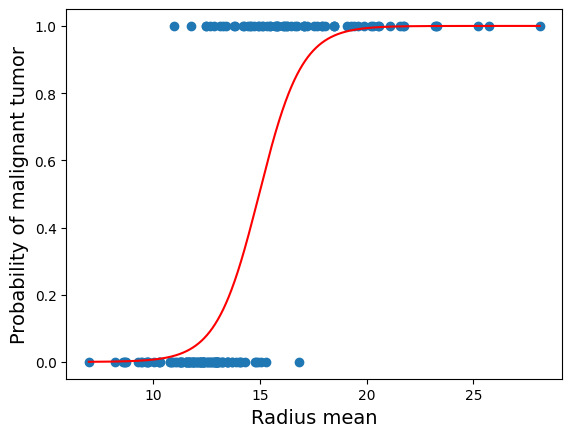

In [8]:
# Graph logistic regression probabilities
plt.scatter(X_test, y_test)
x_prob = np.linspace(X_test.min(), X_test.max(), 1000)
y_prob = logisticModel.predict_proba(x_prob.reshape(-1, 1))[:, 1]
plt.plot(x_prob, y_prob, color='red')
plt.xlabel('Radius mean', fontsize=14);
plt.ylabel('Probability of malignant tumor', fontsize=14);

In [9]:
# Predict the probabilities for the test set
p_hat = logisticModel.predict_proba(X_test)

In [10]:
# Display the log-loss
metrics.log_loss(y_test, p_hat)

0.31342546048710135

In [22]:
metrics.log_loss([1],[0.1], labels= [0,1]) #labels is needed for single instance.

2.3025850929940455